<a href="https://colab.research.google.com/github/JSRV18/Dinosaurio-repository/blob/main/Celda_solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pint
!pip install pint uncertainties
import uncertainties
from uncertainties import ufloat
import pint as pint
ureg=pint.UnitRegistry(auto_reduce_dimensions=True)
Measurement=ureg.Measurement
Quantity=ureg.Quantity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 2.2 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Datos celda solar

#Parte 1
d= np.array([30, 40, 50, 60, 70, 80, 90, 100])
vp1= np.array([2.2, 1.7, 1.1, 0.8, 0.7, 0.05, 0.04, 0.03])
cp1= np.array([0.17, 0.12, 0.09, 0.06, 0.05, 0.03, 0.02, 0.02])

#Parte 2
vp2= np.array([0.3, 1.03, 1.4, 1.82, 1.97, 2.02, 2.04, 2.05, 2.06])
ip2= np.array([0.08, 0.08, 0.08, 0.07, 0.5, 0.03, 0.02, 0.01, 0])

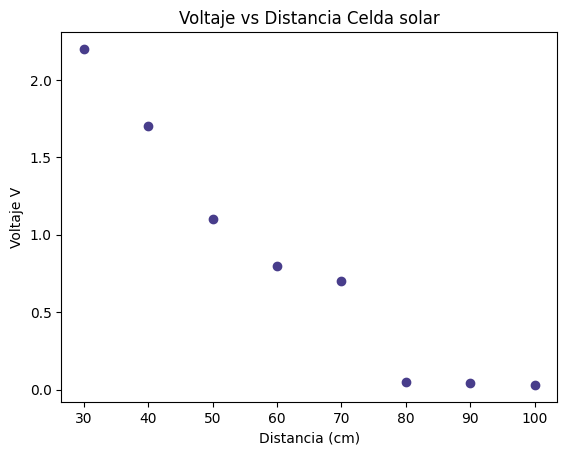

In [5]:

plt.scatter(d, vp1, c="darkslateblue")
plt.title("Voltaje vs Distancia Celda solar")
plt.xlabel("Distancia (cm)")
plt.ylabel("Voltaje V")
plt.show()

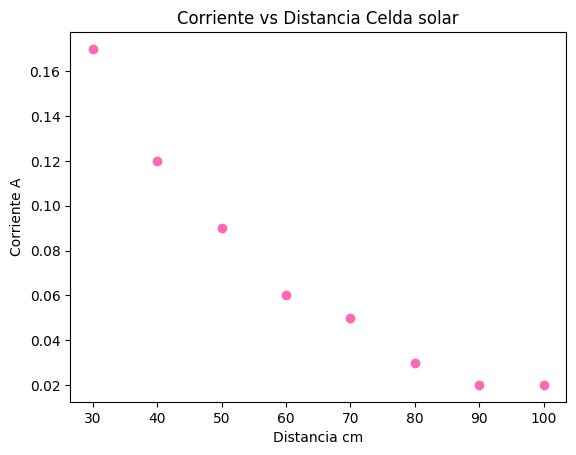

In [6]:
plt.scatter(d, cp1, c="hotpink")
plt.title("Corriente vs Distancia Celda solar")
plt.xlabel("Distancia cm")
plt.ylabel("Corriente A")
plt.show()

/usr/local/lib/python3.11/dist-packages/numpy/ma/core.py:2846: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.11/dist-packages/numpy/ma/core.py:2383: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  a = np.array(a, copy=None, subok=True)


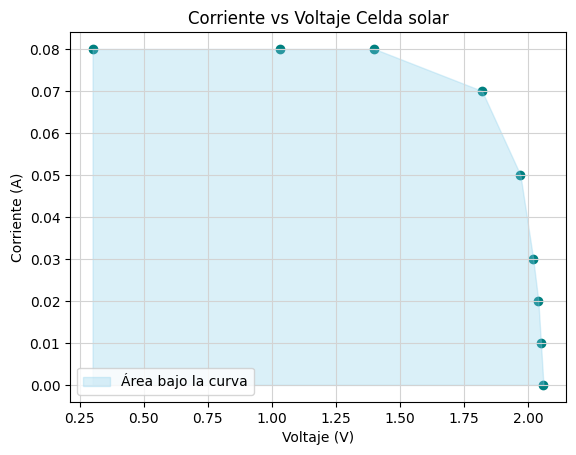

In [7]:
#Potencia máxima

V_P = Quantity([0.3, 1.03, 1.4, 1.82, 1.97, 2.02, 2.04, 2.05, 2.06], 'V')
I_P = Quantity([0.08, 0.08, 0.08, 0.07, 0.05, 0.03, 0.02, 0.01, 0], 'A')

plt.scatter(V_P, I_P, c="teal")
plt.title("Corriente vs Voltaje Celda solar")
plt.xlabel("Voltaje (V)")
plt.ylabel("Corriente (A)")
plt.grid(c="lightgrey")
plt.fill_between(V_P, I_P,color='skyblue', alpha=0.3, label = 'Área bajo la curva')
import matplotlib.patches as mpatches
area_patch = mpatches.Patch(color='skyblue', alpha=0.3, label='Área bajo la curva')
plt.legend(handles=[area_patch], loc='lower left')
plt.show()

In [8]:
from scipy.integrate import simpson

P_Max_A = simpson(I_P.m, V_P.m)

P_Max_A = Quantity(P_Max_A, 'W')

x_half = V_P[::2]
y_half = I_P[::2]
area_2h = simpson(y_half.m, x_half.m)

# Estimación del error
error_est = abs(P_Max_A.m - area_2h) / 15
error_est

P_Max = ufloat(P_Max_A.m, error_est) * ureg.W
P_Max

<Quantity(0.133712+/-0.000155, 'watt')>

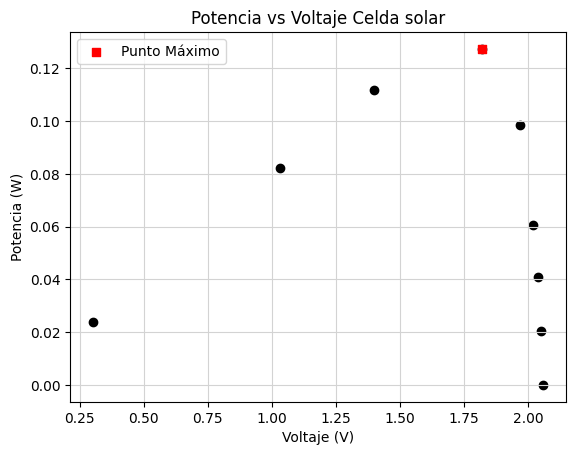

In [9]:
P_P = I_P*V_P
P_P.to("W")
plt.scatter(V_P, P_P, c="k")
plt.title("Potencia vs Voltaje Celda solar")
plt.xlabel("Voltaje (V)")
plt.ylabel("Potencia (W)")
plt.scatter(V_P[3], P_P.max(), c = 'red', label = 'Punto Máximo', marker = ',')
plt.legend()
plt.grid(c="lightgrey")
plt.show()

In [10]:
I_P_R = [ufloat(i.m, i.m * 0.8/100) * ureg.A for i in I_P]
I_P_R

V_P_R = [ufloat(i.m, i.m * 0.8/100) * ureg.V for i in V_P]
V_P_R

P_P_R = [i * v for i, v in zip(I_P_R, V_P_R)]
P_P_R = [i.to("W") for i in P_P_R]
P_P_R

P_P_R_Max = max(P_P_R)
P_P_R_Max

/usr/local/lib/python3.11/dist-packages/uncertainties/core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")
/usr/local/lib/python3.11/dist-packages/pint/facets/plain/quantity.py:1397: FutureWarning: AffineScalarFunc.__gt__() is deprecated. It will be removed in a future release.
  return op(self._magnitude, other._magnitude)


<Quantity(0.127400+/-0.001441, 'watt')>

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:647: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  a = asarray(a, dtype=dtype, order=order)


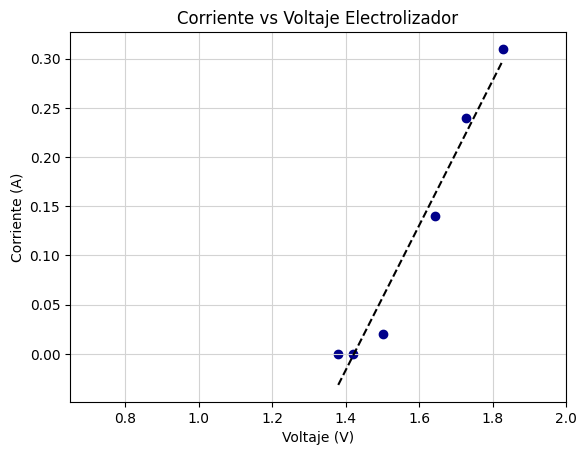

In [11]:
# Electrolizador

V_E = Quantity([1.38, 1.42, 1.502, 1.643, 1.729, 1.828], 'V')

I_E = Quantity([0, 0.00, 0.02, 0.14, 0.24, 0.31], 'A')

def lineal(x, a, b):
    return a*x + b

from scipy.optimize import curve_fit

popt, pcov = curve_fit(lineal, V_E.m, I_E)

plt.plot(V_E.m, lineal(V_E.m, *popt),c = 'k', linestyle ='--', label='Ajuste lineal')
plt.scatter(V_E, I_E, c="darkblue")
plt.title("Corriente vs Voltaje Electrolizador")
plt.xlabel("Voltaje (V)")
plt.ylabel("Corriente (A)")
plt.grid(c="lightgrey")
plt.xlim(0.65, 2)
plt.show()

In [12]:
V_0 = -popt[1]/popt[0]
errV_0 = np.sqrt(np.diag(pcov))[1]/popt[0]**2

V_0 = ufloat(V_0, errV_0) * ureg.V
V_0

<Quantity(1.42298+/-0.21135, 'volt')>

In [13]:
# Eficiencia de Faraday


t = Quantity([108, 125, 96, 103, 102], 's')

v = Quantity([5, 10, 15, 20, 25], 'cm^3')

I_F = Quantity([0.3, 0.29, 0.29, 0.28, 0.28], 'A')

V_F = Quantity([1.845, 1.853, 1.857, 1.862, 1.865], 'V')

P_F = I_F*V_F
P_F = P_F.to('W')

P_Fmean = P_F.mean()
P_Fmean

<Quantity(0.534592, 'watt')>

In [14]:
# Con incertidumbres

v_R = [ufloat(i.m, 2.5) * ureg.cm**3 for i in v]
t_R = [ufloat(i.m, 0.1) * ureg.s for i in t]

I_F_R = [ufloat(i.m, i.m * 0.8/100) * ureg.A for i in I_F]
V_F_R = [ufloat(i.m, i.m * 0.8/100) * ureg.V for i in V_F]

P_F_R = [i * v for i, v in zip(I_F_R, V_F_R)]
P_F_R = [i.to("W") for i in P_F_R]
P_F_R_mean = np.mean(P_F_R)

P_F_R_mean

<Quantity(0.534592+/-0.002706, 'watt')>

In [21]:
R = Quantity(8.314, 'J/(K*mol)')
T = Quantity(298, 'K')
F = Quantity(96485, 'C/mol')
P = Quantity(751.9, 'hPa')
P = P.to('Pa')
t_total = sum(t_R)
i_total = np.mean(I_F_R)
e = 2

V_Teo = (R*T*i_total*t_total)/(F*P*e)
V_Teo.to('cm^3'), i_total, t_total

(<Quantity(26.2609+/-0.0946, 'centimeter ** 3')>,
 <Quantity(0.288000+/-0.001031, 'ampere')>,
 <Quantity(534.000+/-0.224, 'second')>)

In [16]:
V_exp = ufloat(20,2.5) * ureg.cm**3

nF = 100*V_exp/V_Teo
nF

<Quantity(76.1588+/-9.5238, 'dimensionless')>

In [17]:
# Eficiencia Energética

H0 = Quantity(12745, 'kJ/m**3')
H0 = H0.to('J/cm**3')
v_total = np.mean(V_F_R)

nE = (H0*V_exp)/(v_total*i_total*t_total)*100
nE

<Quantity(89.2821+/-11.1695, 'dimensionless')>